# Premium Draft AI

The goal of this project is to predict the probability of winning based on the draft. Of course there are many factors that can influence this probability, but I think that a tool that can predict the result of a game with the draft can at least shows the power of the draft. 

My AI project doesn't need the API Key to work but only data. And obtaining data necessitates the Key.

## But there is a issue...

The issue is that I need a lot of data to make my AI model work. The graphics below show that there is a big overfitting of my model (we see that the validation set accuracy doesn't increase, but the the train set reaches around 100% accuracy : the model generalize). So, with real data, the model can't draw conclusions. 

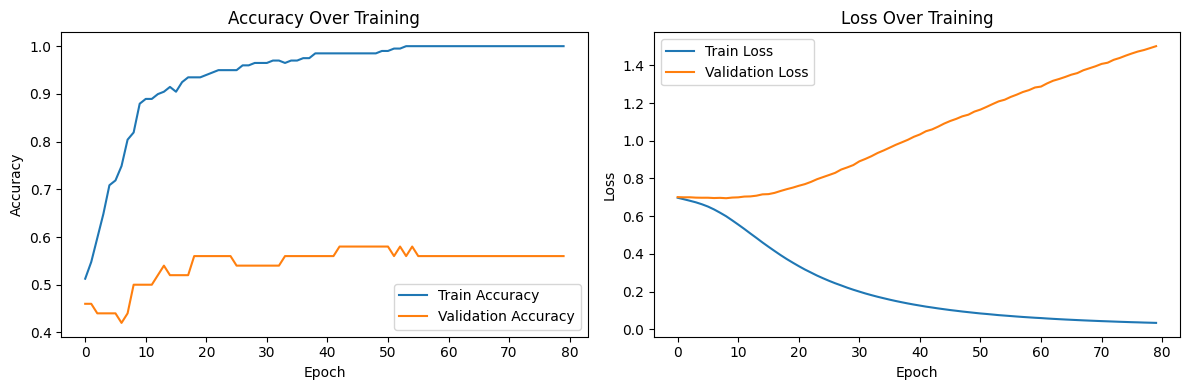

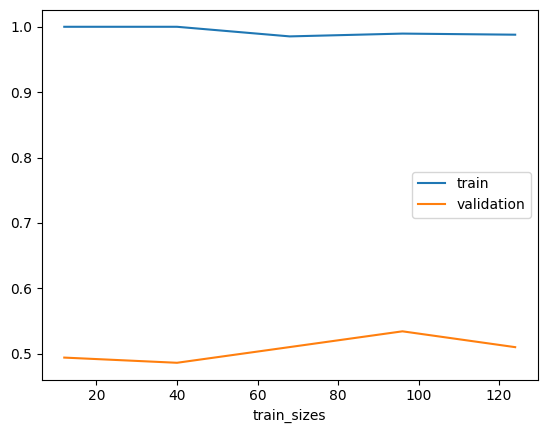

## So, why I need a Production API Key for my project ? 

To fight against overfitting, two solutions are available : get more data and optimize our model. But in my case, optimize my model will never be sufficient. I need more data of matches and of course, with my model, I can do it easily... if I let my PC 24/24 getting data during few days. In addition, my WiFi is very good but sometimes it crashes... It's really not possible for me, and that why I really want a key to improve myself in AI devloppement with more data and to develop a good project !

## My code to get data

Now it's time for me to show you the code that I use to get data. Remember that it's not the project but only the script to get the data that my project use. I will not show the AI project because it need more data to work and it doesn't use the API Key (only the data from the script below).

All the scripts that you will see are compiled in one script, but they aren't working at the same time. For all the scripts, I use the following python library :

In [ ]:
import requests #To get data from the Riot API
import time #To avoid bugs
from tqdm import tqdm #To see the progression in real time
import pandas as pd #To make data table and to export
import numpy as np #To "play" with value

In [ ]:
api_key = '' #Insert API Key here
id_list = []

#### Function to get the summoner ID (Iron to Diamond)

In [ ]:
def GetSumID(rank, tier, page, api_key=api_key):
    api_url = 'https://EUW1.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/{}/{}?page={}&api_key={}'.format(rank,tier,page,api_key)
    api = requests.get(api_url)
    try: 
        lenght = len(api.json()) - 1
    finally:
        if api.status_code == 429:
                time.sleep(30)
    for sum in range(lenght):
        try:
            id_list.append(api.json()[sum]['summonerId'])
        finally:
            if api.status_code == 429:
                time.sleep(30)
                continue
    return id_list

#### Function to get the summoner ID (Master to Challenger)

In [ ]:
def GetSumID2(rank, api_key=api_key):
    api_url = 'https://euw1.api.riotgames.com/lol/league/v4/{}leagues/by-queue/RANKED_SOLO_5x5?api_key={}'.format(rank,api_key)
    api = requests.get(api_url)
    try:
        lenght = len(api.json()['entries']) - 1
    finally:
        if api.status_code == 429:
            time.sleep(30)
    for sum in range(lenght):
        try:
            id_list.append(api.json()['entries'][sum]['summonerId'])
        finally:
            if api.status_code == 429:
                time.sleep(30)
                continue
    return id_list

#### Function to control the first

In [ ]:
def AutoRank(id_list=id_list, api_key=api_key):
    id_list = []
    max_lenght = 0
    ranks = ['IRON','BRONZE','SILVER','GOLD','PLATINUM','EMERALD','DIAMOND']
    tiers = ['IV','III','II','I']
    pages = np.arange(1,5)
    for rank in tqdm(ranks):
        time.sleep(3)
        for tier in range(0,4):
            for page in pages:
                id_list = GetSumID(rank=rank, tier=tiers[tier], page=str(page), api_key=api_key)
        
        lenght_local = len(id_list) - 1
        
        if rank == 'IRON':
            serie1 = pd.Series(id_list[0:lenght_local])
        elif rank == 'BRONZE':
            serie2 = pd.Series(id_list[0:lenght_local])
        elif rank == 'SILVER':
            serie3 = pd.Series(id_list[0:lenght_local])
        elif rank == 'GOLD':
            serie4 = pd.Series(id_list[0:lenght_local])
        elif rank == 'PLATINUM':
            serie5 = pd.Series(id_list[0:lenght_local])
        elif rank == 'EMERALD':
            serie6 = pd.Series(id_list[0:lenght_local])
        elif rank == 'DIAMOND':
            serie7 = pd.Series(id_list[0:lenght_local])
        lenght_local = None
        id_list.clear()
    
    return serie1, serie2, serie3, serie4, serie5, serie6, serie7

#### Function to control the second

In [ ]:
def AutoRank2(id_list=id_list, api_key=api_key):
    id_list = []
    max_lenght = 0
    ranks = ['master','grandmaster','challenger']
    for rank in tqdm(ranks):
        time.sleep(3)
        id_list = GetSumID2(rank=rank, api_key=api_key)
        
        lenght_local = len(id_list) - 1
        
        if rank == 'master':
            serie8 = pd.Series(id_list[0:lenght_local])
        elif rank == 'grandmaster':
            serie9 = pd.Series(id_list[0:lenght_local])
        elif rank == 'challenger':
            serie10 = pd.Series(id_list[0:lenght_local])
        lenght_local = None
        id_list.clear()
    
    return serie8, serie9, serie10

#### Triggering of functions

In [ ]:
serie1, serie2, serie3, serie4, serie5, serie6, serie7 = AutoRank()
serie8, serie9, serie10 = AutoRank2()

#### Conversion of the ID to PUUID

In [ ]:
def PUUID1():
    puuid = []
    for row in tqdm(serie1[0:697]):
        try:
            api_url = 'https://euw1.api.riotgames.com/lol/summoner/v4/summoners/' + row + '?api_key=' + api_key
            api = requests.get(api_url)
            summoner = api.json()['puuid']
        finally:
            if api.status_code == 429:
                time.sleep(121)
                continue
            else:
                summoner = api.json()['puuid']
                puuid.append(summoner)
                continue
    pserie1 = pd.Series(puuid)
    return pserie1

In [ ]:
pserie1 = PUUID1()

This is only for the iron rank, but I did it for each rank. Why I do this ? To control more my script because when my wifi crash, its really boring to run again all the script. So if my WiFi crash during the loading of the Gold player data, I still have the data of the iron, bronze and silver players. 

#### Export

In [ ]:
puuid = pd.concat([pserie1, pserie2, pserie3, pserie4, pserie5, pserie6, pserie7, pserie8, pserie9, pserie10], axis=1, keys=['Iron','Bronze','Silver','Gold','Platinum','Emerald','Diamond','Master','GrandMaster','Challenger'])

In [ ]:
puuid.to_csv('PuuID.csv', index=False)

## Now, let's get the 10 last match ID for each player

In [ ]:
puuid = pd.read_csv('PuuID.csv')

#### Function to get the matchID of the 10 last match of the Iron players

In [ ]:
def match1(count=10, api_key=api_key):
    match_list = []
    for player in tqdm(puuid['Iron']):
        api_url = 'https://europe.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?start=0&count={}&api_key={}'.format(player, count, api_key)
        try:
            api = requests.get(api_url)
        finally:
            if api.status_code == 429:
                time.sleep(121)
        for match in api.json():
            match_list.append(match)
    match1 = pd.Series(match_list)
    return match1

In [ ]:
match1 = match1()

Like the PUUID function, I did it for each rank.

#### Export

In [ ]:
df = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9, match10], axis=1, keys=['Iron','Bronze','Silver','Gold','Platinum','Emerald','Diamond','Master','GrandMaster','Challenger'])

In [ ]:
df.to_csv('Match.csv', index=False)

## And now, let's see the final script : get data from matchID for my AI model

In [ ]:
patch = 6552056423 #Here is a filter to select the data from the most recent patch => 6552056423 is only an example

In [ ]:
matchid = pd.read_csv('Match.csv')

#### First filter

In [ ]:
def filtre(patch=patch):
    ranks = ['Iron','Bronze','Silver','Gold','Platinum','Emerald','Diamond','Master','GrandMaster','Challenger']
    after = matchid.copy()
    for rank in tqdm(ranks):
        count = 0
        for row in after[rank]:
            check = after[rank][count]
            
            if type(row) == float:
                after[rank][count] = None
                count += 1
            elif 'status' in check:
                after[rank][count] = None
                count += 1
            elif 'EUN' in check:
                after[rank][count] = None
                count += 1
            elif 'T' in check:
                after[rank][count] = None
                count += 1
            else:
                number = row.replace('EUW1_','')
                number = int(number)
                if number < patch:
                    after[rank][count] = None
                    count += 1
                else:
                    count += 1
                    
    return after

In [ ]:
after = filtre()

#### Second filter 

In [ ]:
def iron(api_key=api_key):
    top1 = []
    jungle1  =[]
    middle1 =[]
    bot1 = []
    support1 = []
    top2 = []
    jungle2  =[]
    middle2 =[]
    bot2 = []
    support2 = []
    game = []
    for row in tqdm(after['Iron'][0:300]):
        api_url = 'https://europe.api.riotgames.com/lol/match/v5/matches/{}?api_key={}'.format(row, api_key)
        api = requests.get(api_url)
        if api.status_code == 429:
                time.sleep(121)
                api = requests.get(api_url)
                if api.status_code == 200:
                    if api.json()['info']['gameMode'] == 'CLASSIC':
                        top1.append(api.json()['info']['participants'][0]['championName'])
                        jungle1.append(api.json()['info']['participants'][1]['championName'])
                        middle1.append(api.json()['info']['participants'][2]['championName'])
                        bot1.append(api.json()['info']['participants'][3]['championName'])
                        support1.append(api.json()['info']['participants'][4]['championName'])
                        top2.append(api.json()['info']['participants'][5]['championName'])
                        jungle2.append(api.json()['info']['participants'][6]['championName'])
                        middle2.append(api.json()['info']['participants'][7]['championName'])
                        bot2.append(api.json()['info']['participants'][8]['championName'])
                        support2.append(api.json()['info']['participants'][9]['championName'])
                        game.append(api.json()['info']['participants'][0]['win'])
                        continue
        elif api.status_code == 200:
            if api.json()['info']['gameMode'] == 'CLASSIC':
                top1.append(api.json()['info']['participants'][0]['championName'])
                jungle1.append(api.json()['info']['participants'][1]['championName'])
                middle1.append(api.json()['info']['participants'][2]['championName'])
                bot1.append(api.json()['info']['participants'][3]['championName'])
                support1.append(api.json()['info']['participants'][4]['championName'])
                top2.append(api.json()['info']['participants'][5]['championName'])
                jungle2.append(api.json()['info']['participants'][6]['championName'])
                middle2.append(api.json()['info']['participants'][7]['championName'])
                bot2.append(api.json()['info']['participants'][8]['championName'])
                support2.append(api.json()['info']['participants'][9]['championName'])
                game.append(api.json()['info']['participants'][0]['win'])
                continue
    top1_serie = pd.Series(top1)
    jungle1_serie = pd.Series(jungle1)
    middle1_serie = pd.Series(middle1)
    bot1_serie = pd.Series(bot1)
    support1_serie = pd.Series(support1)
    top2_serie = pd.Series(top2)
    jungle2_serie = pd.Series(jungle2)
    middle2_serie = pd.Series(middle2)
    bot2_serie = pd.Series(bot2)
    support2_serie = pd.Series(support2)
    game_serie = pd.Series(game)
    iron = pd.concat([top1_serie, jungle1_serie, middle1_serie, bot1_serie, support1_serie, top2_serie, jungle2_serie, middle2_serie, bot2_serie, support2_serie, game_serie], axis=1, keys=['Top1','Jungle1','Middle1','ADC1','Support1','Top2','Jungle2','Middle2','ADC2','Support2','WIN'])
    return iron

In [ ]:
Iron = iron()

And again, to have more control and don't lose all my work when my WiFi crash, I did it for each rank.

#### Export

In [ ]:
Iron.to_csv('Iron.csv', index=False)

For each rank

## End of script

With this script I got all the data that i needed to start my AI project. But with API Key limit rate, I can't have a sufficient number of data. Hope you will enjoy my script, any feedback apreciate ! 